In [45]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plot Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Imports and Dataset
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

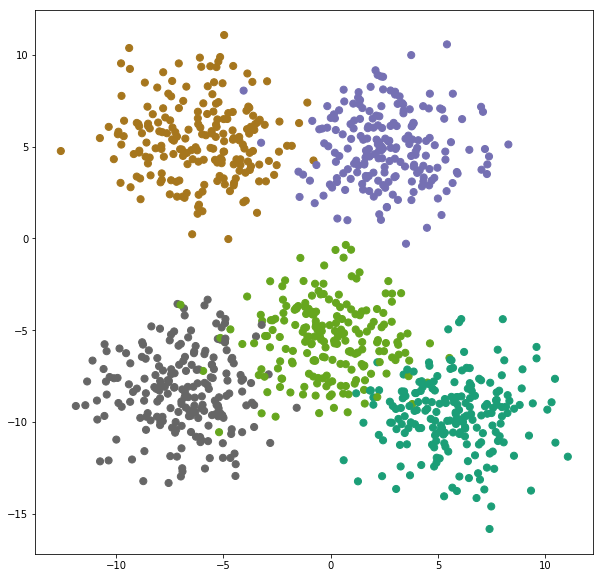

In [46]:
# Make a random set of blob clusters to represent different classes of data
X,y = make_blobs(n_samples=1000, centers=5, random_state=10, cluster_std =2.1)

# Visualise these in a scatter plot
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='Dark2')

In [47]:
def visualise_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

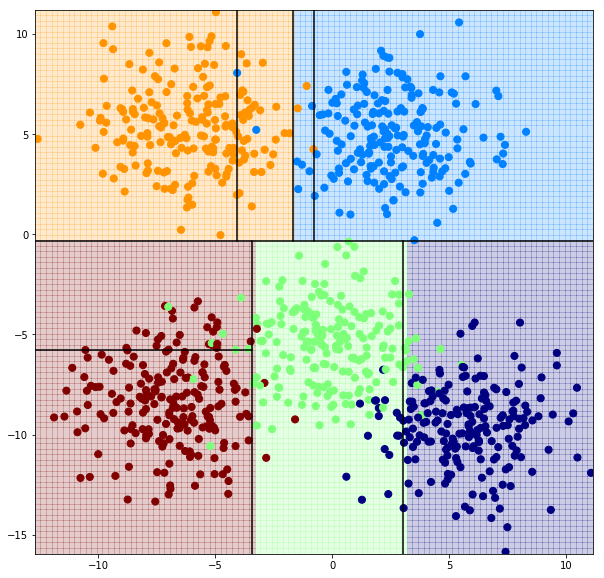

In [48]:
# Make a variable for the decision tree and visualise using the created function-this is overfitted at a depth of 3
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
visualise_tree(clf,X,y)

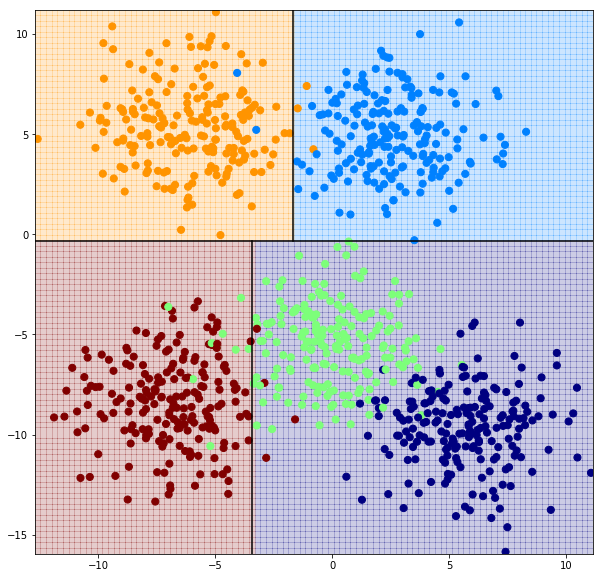

In [49]:
# Make a variable for the decision tree and visualise using the created function-this is underfitted at a depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
visualise_tree(clf,X,y)

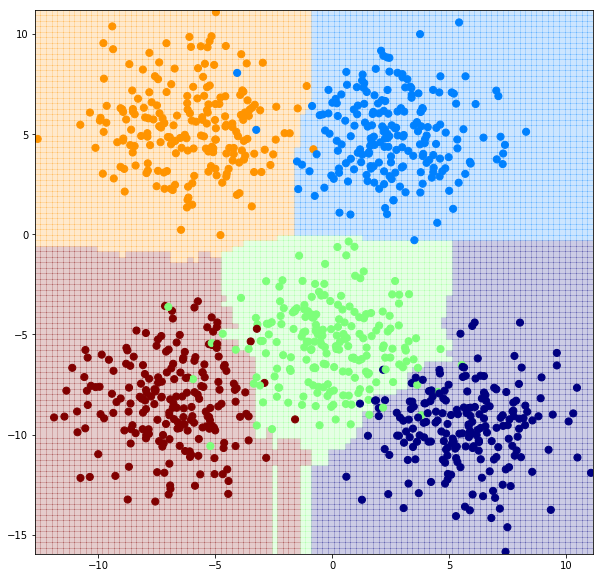

In [50]:
# Import Random Forest tool and visualisethe Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150, random_state=0)
visualise_tree(clf,X,y,boundaries=False)

In [51]:
# Create an array of random numbers and create a function that creates a variant of a sin model on this with random noise
x = 10 * np.random.rand(100)

In [52]:
def sin_model(x,sigma=0.2):
    
    noise = sigma * np.random.randn(len(x))
    
    return np.sin(3 * x) + np.sin(0.3 * x) + noise

In [53]:
y = sin_model(x)

<Container object of 3 artists>

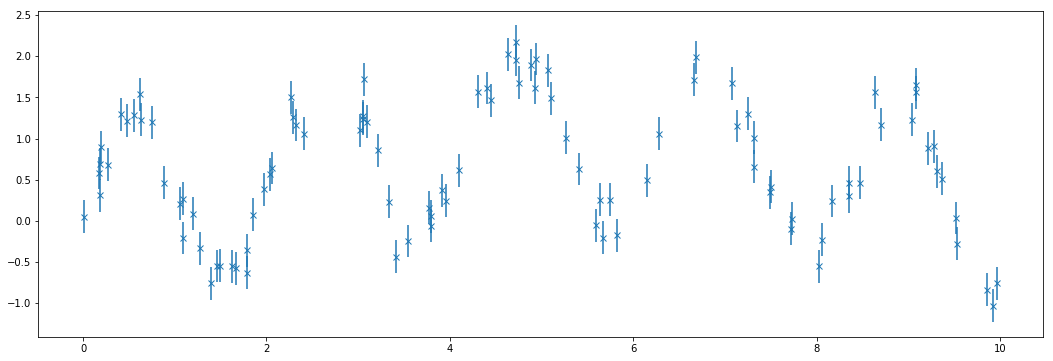

In [54]:
# Plot the sin graph
plt.figure(figsize=(18,6))
plt.errorbar(x,y,0.2,fmt='x')

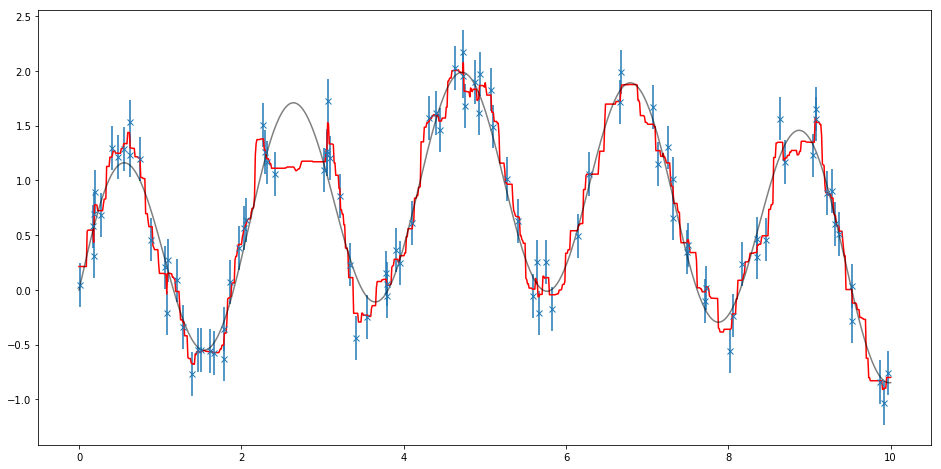

In [56]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Creating X and Y points using RandomForestRegressor, plot predicted Y points against actual Y points
xfit = np.linspace(0,10,1000)
rfr = RandomForestRegressor(150)
rfr.fit(x[:,None],y)
yfit = rfr.predict(xfit[:,None])
ytrue = sin_model(xfit,0)

# Plot
plt.figure(figsize=(16,8))
plt.errorbar(x,y,0.2, fmt='x')

plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k', alpha=0.5)